## - Target Parameters


**1. Q-BPM(Beam Position Monitor) position : 6 parameters**

    - qbpm1 : BL:HX:OH:QBPM1:analog_in_x_pos
    - qbpm2 :  BL:HX:OH:QBPM1:analog_in_y_pos
    - qbpm3 : BL:HX:OH:QBPM1:analog_in_totsum
    - qbpm4 : BL:HX:OH:QBPM2:analog_in_x_pos
    - qbpm5 : BL:HX:OH:QBPM2:analog_in_y_pos
    - qbpm6 :BL:HX:OH:QBPM2:analog_in_totsum

**2. BLM(Bea Loss Monitor)**

  1) Hard X-ray Undulator : 40 parameters
    - HU1:BLM:M01:BotBlmMain / HU1:BLM:M01:TopBlmMain
    - HU1:BLM:M02:BotBlmMain / HU1:BLM:M02:TopBlmMain
    - HU1:BLM:M03:BotBlmMain / HU1:BLM:M03:TopBlmMain
    - HU1:BLM:M04:BotBlmMain / HU1:BLM:M04:TopBlmMain
    - HU1:BLM:M05:BotBlmMain / HU1:BLM:M05:TopBlmMain
    - HU1:BLM:M06:BotBlmMain / HU1:BLM:M06:TopBlmMain
    - HU1:BLM:M07:BotBlmMain / HU1:BLM:M07:TopBlmMain
    - HU1:BLM:M08:BotBlmMain / HU1:BLM:M08:TopBlmMain
    - HU1:BLM:M09:BotBlmMain / HU1:BLM:M09:TopBlmMain
    - HU1:BLM:M10:BotBlmMain / HU1:BLM:M10:TopBlmMain
    - HU1:BLM:M11:BotBlmMain / HU1:BLM:M11:TopBlmMain
    - HU1:BLM:M12:BotBlmMain / HU1:BLM:M12:TopBlmMain
    - HU1:BLM:M13:BotBlmMain / HU1:BLM:M13:TopBlmMain
    - HU1:BLM:M14:BotBlmMain / HU1:BLM:M14:TopBlmMain
    - HU1:BLM:M15:BotBlmMain / HU1:BLM:M15:TopBlmMain
    - HU1:BLM:M16:BotBlmMain / HU1:BLM:M16:TopBlmMain
    - HU1:BLM:M17:BotBlmMain / HU1:BLM:M17:TopBlmMain
    - HU1:BLM:M18:BotBlmMain / HU1:BLM:M18:TopBlmMain
    - HU1:BLM:M19:BotBlmMain / HU1:BLM:M19:TopBlmMain
    - HU1:BLM:M20:BotBlmMain / HU1:BLM:M20:TopBlmMain
    
   2) Soft X-ray Undulator : 14 parameters
    - SU1:BLM:M01:BotBlmMain / SU1:BLM:M01:TopBlmMain
    - SU1:BLM:M02:BotBlmMain / SU1:BLM:M02:TopBlmMain
    - SU1:BLM:M03:BotBlmMain / SU1:BLM:M03:TopBlmMain
    - SU1:BLM:M04:BotBlmMain / SU1:BLM:M04:TopBlmMain
    - SU1:BLM:M05:BotBlmMain / SU1:BLM:M05:TopBlmMain
    - SU1:BLM:M06:BotBlmMain / SU1:BLM:M06:TopBlmMain
    - SU1:BLM:M07:BotBlmMain / SU1:BLM:M07:TopBlmMain

**3. E-beam arrival time monitor**

**Import Library**

In [2]:
import urllib3
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

**Data Handling Function**

In [82]:
class data_pre:
    
    def pooling(self, parameter_list, save_list, start_date='2017-10-21T00%3A00%3A01', end_date='2017-12-31T23%3A59%3A59'):
        
        '''
        After loading from server data, save data(format:json) to local   

        Arguement

        parameter_list : list of all data that we will load
        save_list : json saving name of list
        start_date : start date of loading (ex 2017-01-01T03%3A47%3A25 : 2017-01-01 3:47:25)
        end_date : end date of loading (ex 2017-12-31T17%3A56%3A18 : 2017-12-31 17:56:18)
        '''
        
        # load data from server
        
        for i in range(len(parameter_list)):
            
            http = urllib3.PoolManager()
            r = http.request('GET', 'http://192.168.1.213:17668/retrieval/data/getData.json?pv=' + str(parameter_list[i]) + 
                             '&from=' + start_date + '.000Z'+
                             '&to=' + end_date + '.000Z')
            data = json.loads(r.data.decode('utf-8')) # load data using 'utf-8' decoding

         # Save the parameter_list files

            with open(str('data/json_data/target/'+ save_list[i] + '.json'), 'w') as fp:
                json.dump(data, fp)

        print("All parameters are saved to json format")        
        
        
    def json_to_csv(self, json_list, param_dir, csv_name_list):
        '''
        Convert json format to csv format and remove unnecessary columns
        
        Argument
        
        json_list : json file 
        param_dir : save directory
        csv_name_list : 
        '''
    
        for i in range(len(json_list)):
            param = pd.read_json("./data/json_data/" + param_dir + "/" + json_list[i] + ".json")
            param_df = pd.DataFrame(param.data[0][1:-1])
            param_df = param_df.drop(labels=['severity', 'status'], axis=1)
            param_df = param_df[['secs','nanos','val']]
            param_df.to_csv("./data/csv_data/" + param_dir + "/" + csv_name_list[i] + ".csv", index=False)

        print("All json data are converted to csv files")
        
        
    def load_csv(self, csv_list, param_dir = 'input'):

        param_list = []
        
        for i in range(len(csv_list)):
            param_list.append(pd.read_csv("./data/csv_data/" + param_dir + "/" + csv_list[i] + '.csv'))

        return param_list

**Data Visualization Function**

In [81]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

def density_plot(ls, param_name):
    
    for i in range(len(ls)):
        data = ls[i].val
        data.plot.kde(figsize=(10,10))
        plt.savefig('./image/' + param_name + str(i+1) + '_kde.png')
        plt.show()
        plt.close()
        
def scatter_plot(ls, param_name):
    
    for i in range(len(ls)):
        ls[i].plot(x='secs', y='val', kind='scatter', s=2, figsize=(10,10))
        plt.savefig('./image/' + param_name + str(i+1) + '_scatter.png')
        plt.show()
        plt.close()
        
def make_xy_df(x, y):
    
    x = x.drop(labels=['secs', 'nanos'], axis=1)
    x = x.rename(columns={'val':'x'})
    x['secs'] = np.array(np.arange(1, len(x)+1))
    x = x[['secs','x']]
    
    y = y.drop(labels=['secs', 'nanos'], axis=1)
    y = y.rename(columns={'val':'y'})
    y['secs'] = np.array(np.arange(1, len(y)+1))
    y = y[['secs','y']]
    
    xy = pd.merge(x, y, on = 'secs')
    
    return xy

def make_3d_scatter(x, y, z):

    fig = plt.figure(figsize=(15,15))
    ax = fig.gca(projection='3d')
    ax.scatter(x, y, z, s=2)
    ax.legend()
    ax.set_xlabel('x', labelpad=20)
    ax.set_ylabel('secs', labelpad=20)
    ax.set_zlabel('y', labelpad=20)
    plt.savefig('./image/3d_plot.png')
    plt.show()        

### 1) Q-BPM 

In [26]:
# Q-BPM position parameters (6 paramrters)

qbpm_list = ['BL:HX:OH:QBPM1:analog_in_x_pos', 'BL:HX:OH:QBPM1:analog_in_y_pos', 'BL:HX:OH:QBPM1:analog_in_totsum',
              'BL:HX:OH:QBPM2:analog_in_x_pos', 'BL:HX:OH:QBPM2:analog_in_y_pos', 'BL:HX:OH:QBPM2:analog_in_totsum']

qbpm_json = ['BL-HX-OH-QBPM1-analog_in_x_pos', 'BL-HX-OH-QBPM1-analog_in_y_pos', 'BL-HX-OH-QBPM1-analog_in_totsum',
              'BL-HX-OH-QBPM2-analog_in_x_pos', 'BL-HX-OH-QBPM2-analog_in_y_pos', 'BL-HX-OH-QBPM2-analog_in_totsum']

qbpm_csv = ['qbpm1_x', 'qbpm1_y', 'qbpm1_intensity', 'qbpm2_x', 'qbpm2_y', 'qbpm2_intensity']

**Data Pooling**

In [10]:
# Q-BPM parameters are saved
data_prep = data_pre()
data_prep.pooling(qbpm_list, qbpm_json)

**Converting format : json to csv**

In [ ]:
def qbpm_json_csv(qbpm_json, qbpm_csv):
    for i, qbpm in enumerate(qbpm_json):
        with open('./data/json_data/target/' + qbpm + 'json') as f:
            data = json.load(f)

        qbpm = pd.DataFrame(data)
        qbpm = pd.DataFrame(qbpm.data[0][1:-1])
        qbpm = qbpm.drop(labels=['severity', 'status'], axis=1)
        qbpm = qbpm[['secs', 'nanos', 'val']]
        qbpm.to_csv("./data/csv_data/target/" + qbpm_csv[i] + '.csv', index=False)
    
    print('All json format data convert to csv format data')

In [16]:
qbpm_json_csv(qbpm_json, qbpm_csv)

### Q-BPM position visualization

- Data Period: 2017.10.21 00:00:01 ~ 2017.10.24 4:52:33

In [27]:
data_prep = data_pre()
qbpm = data_prep.load_csv(qbpm_csv, param_dir='target/qbpm')

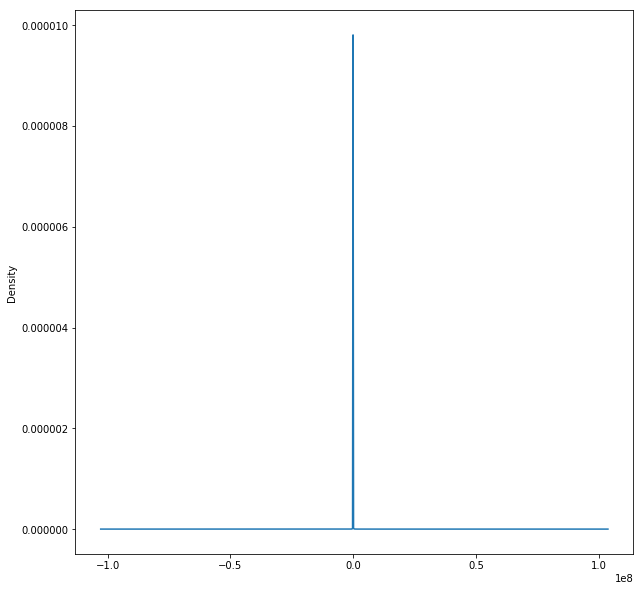

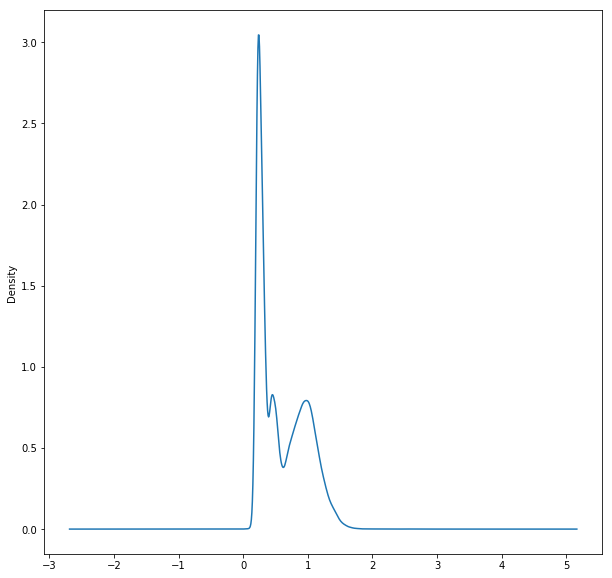

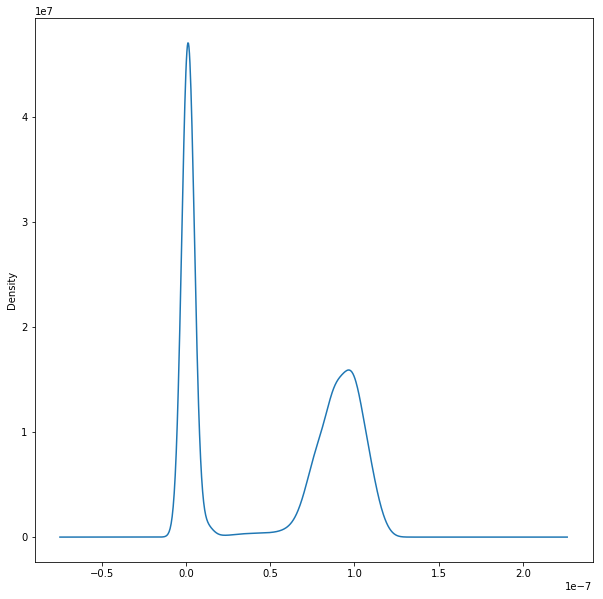

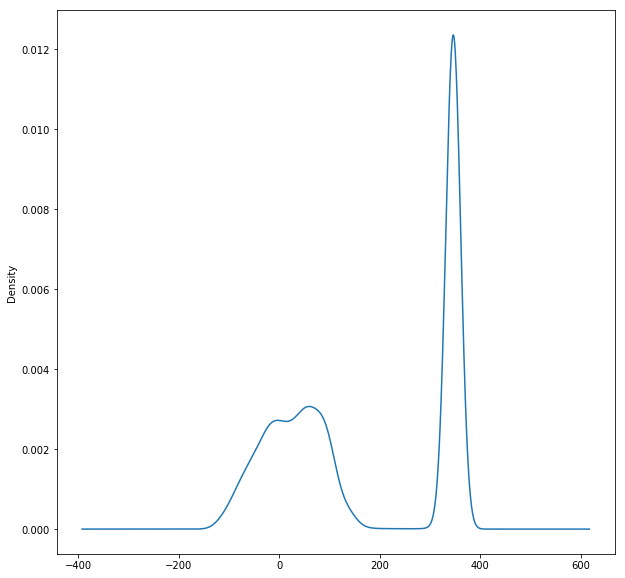

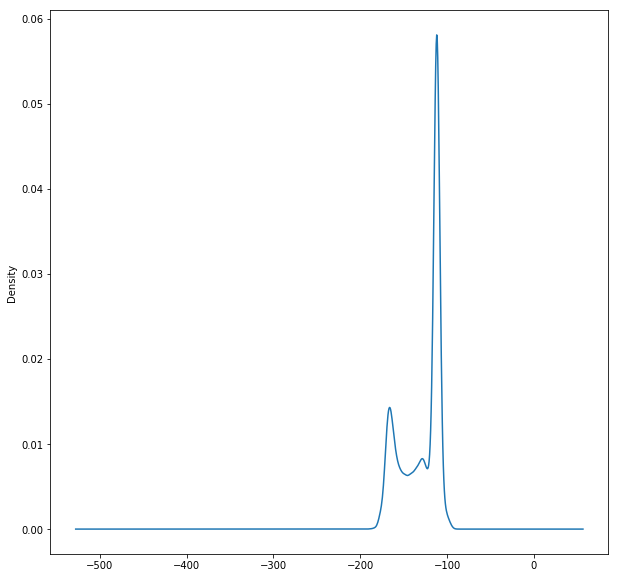

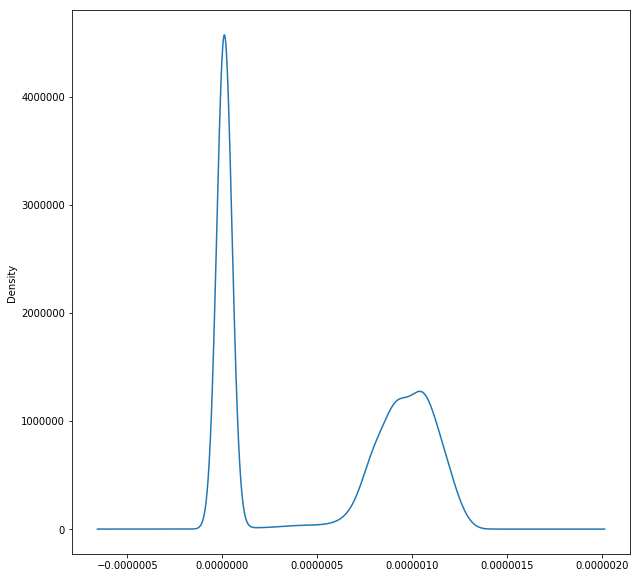

In [43]:
# Kernel density plot
density_plot(qbpm, 'qbpm')

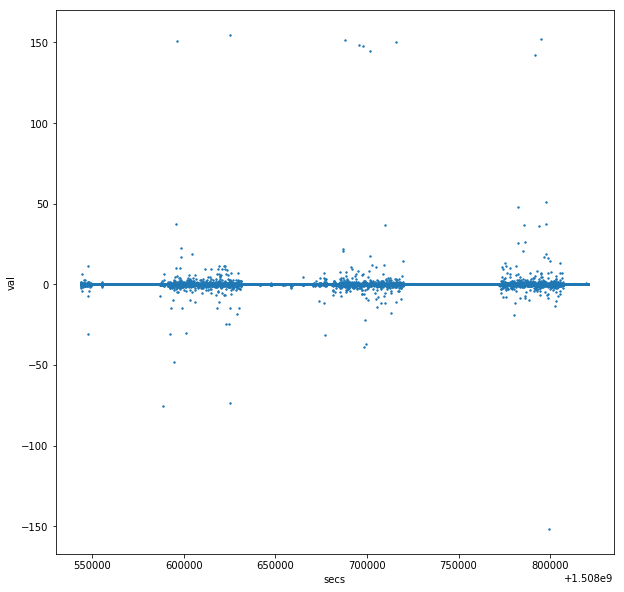

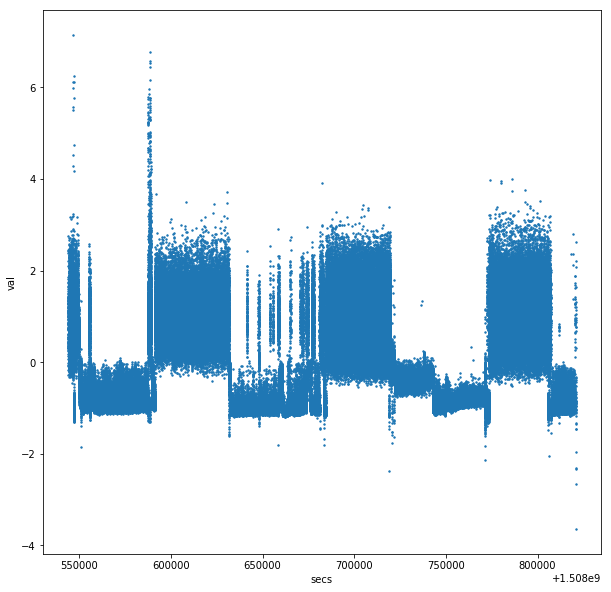

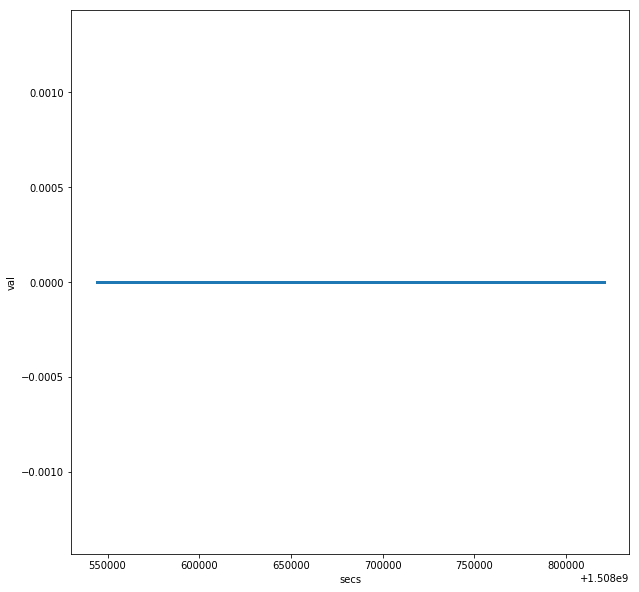

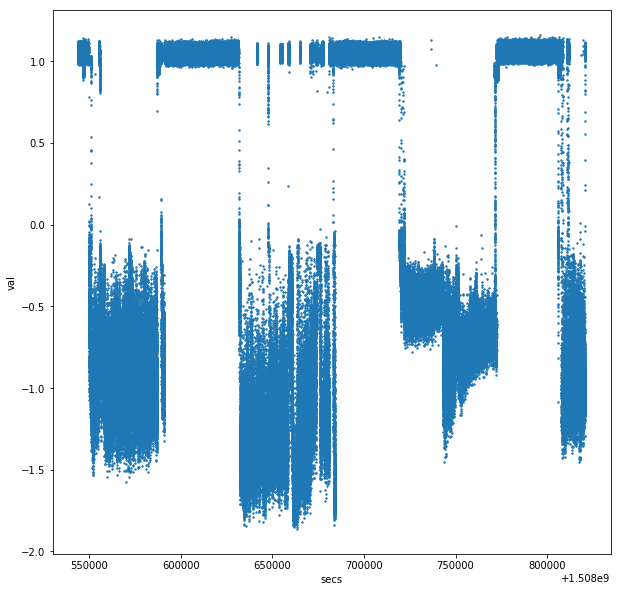

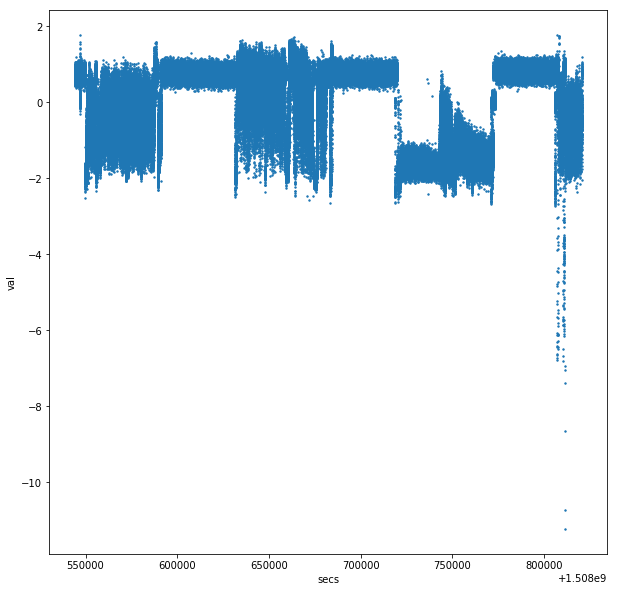

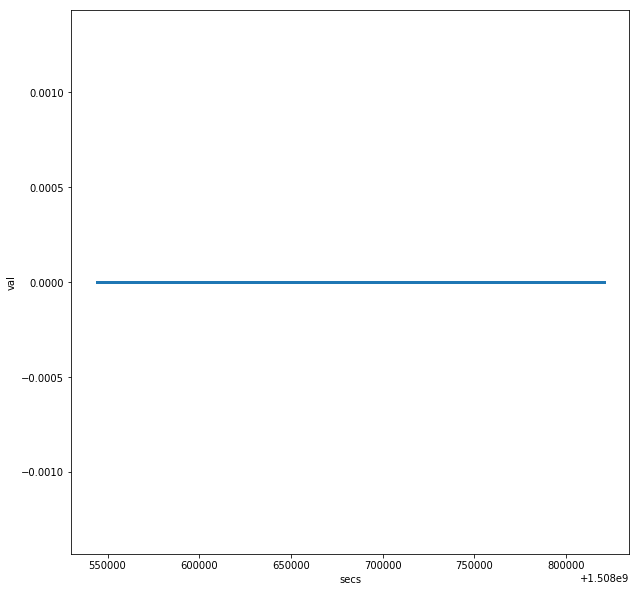

In [57]:
# Scatter plot
scatter_plot(qbpm, 'qbpm')

**Data Scaling & 3d Plot**

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [45]:
qbpm1_x = qbpm[0]
qbpm1_y = qbpm[1]
qbpm1_sum = qbpm[2]

qbpm2_x = qbpm[3]
qbpm2_y = qbpm[4]
qbpm2_sum = qbpm[5]

In [60]:
qbpm1_x.val = scaler.fit_transform(qbpm1_x.val.values.reshape(-1,1))
qbpm1_y.val = scaler.fit_transform(qbpm1_y.val.values.reshape(-1,1))
qbpm1_sum.val = scaler.fit_transform(qbpm1_sum.val.values.reshape(-1,1))

qbpm2_x.val = scaler.fit_transform(qbpm2_x.val.values.reshape(-1,1))
qbpm2_y.val = scaler.fit_transform(qbpm2_y.val.values.reshape(-1,1))
qbpm2_sum.val = scaler.fit_transform(qbpm2_sum.val.values.reshape(-1,1))

In [47]:
len(qbpm1_x), len(qbpm1_y), len(qbpm2_x), len(qbpm2_y)

(276327, 276331, 276310, 276311)

In [48]:
# Slicing for fitting data sinc
qbpm1_y = qbpm1_y[:-4]
qbpm2_y = qbpm2_y[:-1]

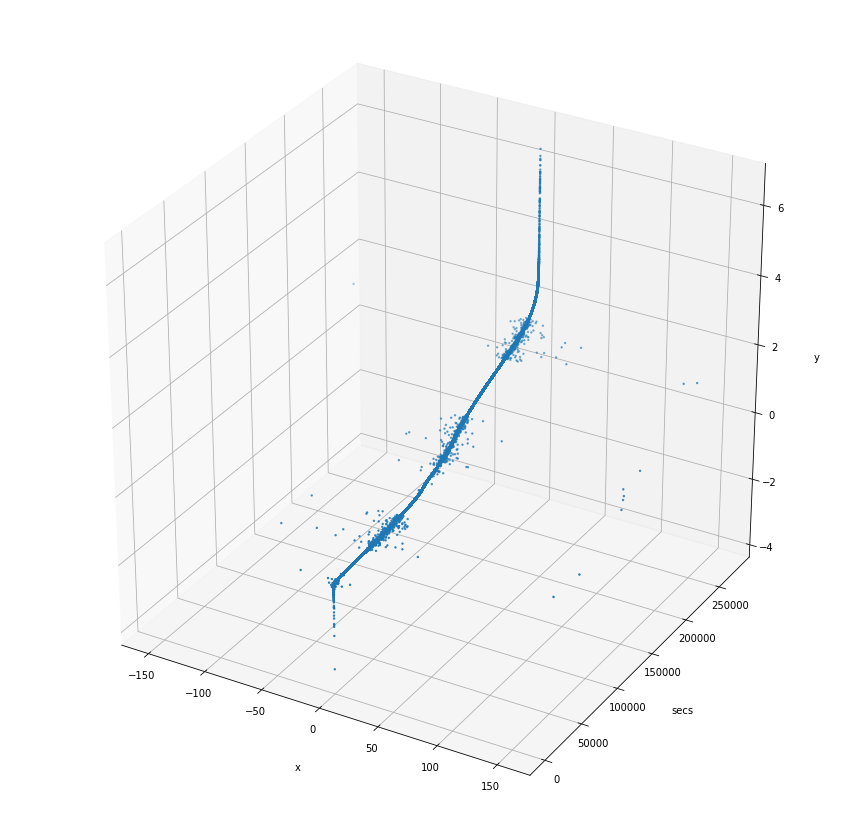

In [61]:
qbpm1_xy = make_xy_df(qbpm1_x, qbpm1_y)
make_3d_scatter(qbpm1_xy.x, qbpm1_xy.secs, qbpm1_xy.y)

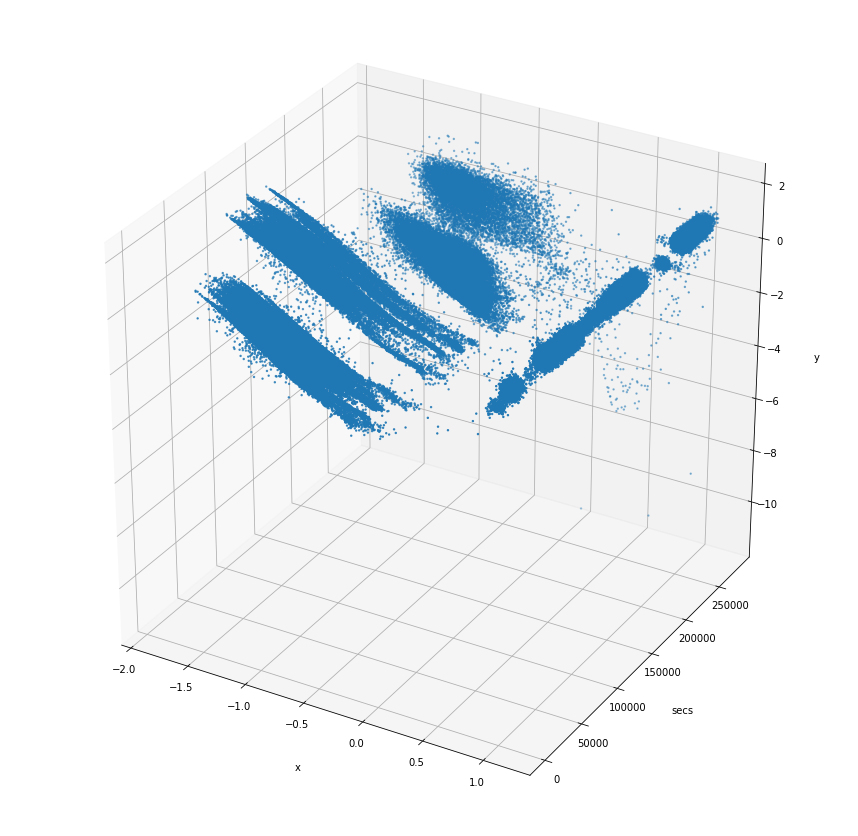

In [62]:
qbpm2_xy = make_xy_df(qbpm2_x, qbpm2_y)
make_3d_scatter(qbpm2_xy.x, qbpm2_xy.secs, qbpm2_xy.y)

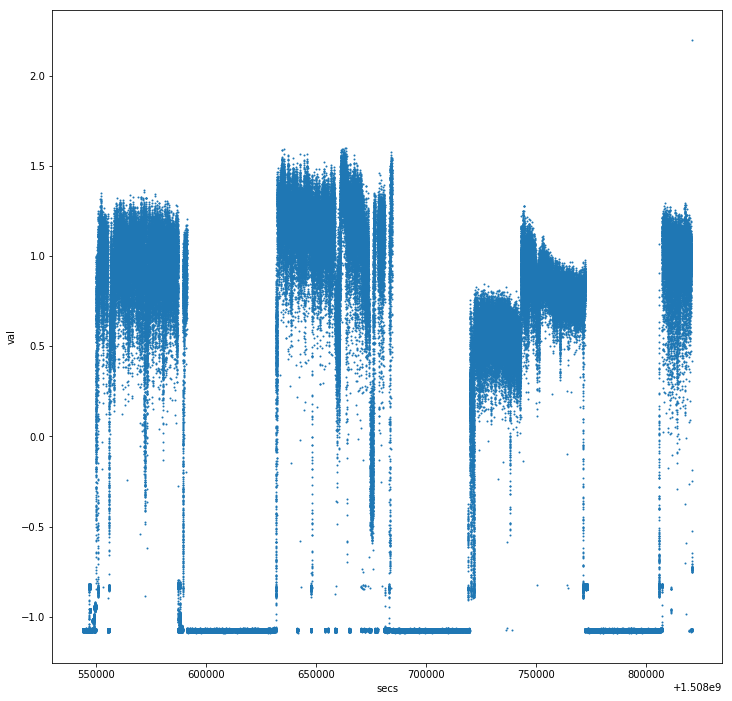

In [63]:
qbpm1_sum.plot(kind='scatter', x='secs', y='val', s=1, figsize=(12,12))
plt.savefig('./image/qbpm1_sum_scatter.png')

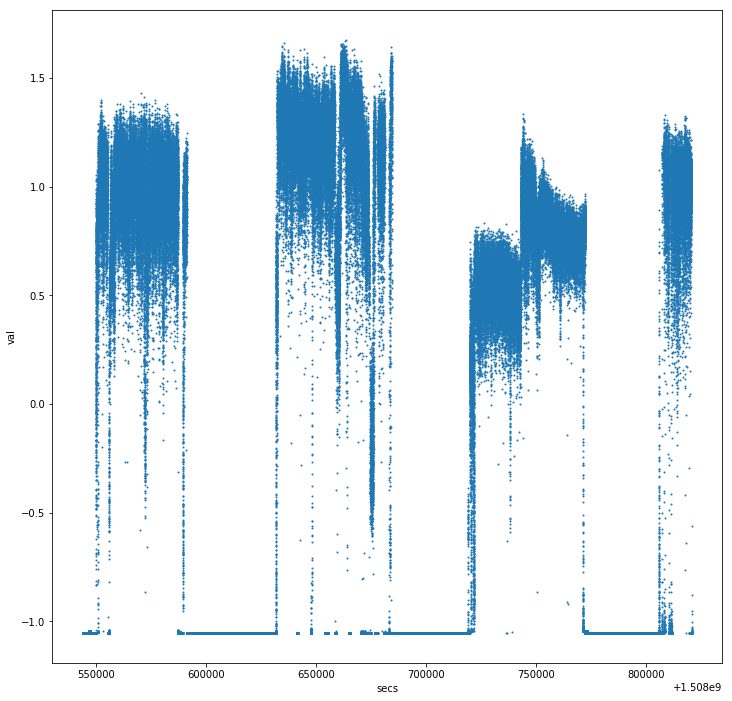

In [64]:
qbpm2_sum.plot(kind='scatter', x='secs', y='val', s=1, figsize=(12,12))
plt.savefig('./image/qbpm2_sum_scatter.png')

### 2) BLM

**Make BLM List**

In [19]:
def blm_list(xray, length, location, form):
    '''
    Arguments
        xray : 'H' or 'S'
        length : length of the parameters
        location : sensor location('Bot' or 'Top')
        form : ':' or '-'
    '''
    blm = []
    
    for i in range(length):
        if i < 9:
            blm.append(xray + 'U1' + form + 'Blm' + form + 'M0' + str(i+1) + form + location + 'BlmMain')
        else:
            blm.append(xray + 'U1' + form + 'Blm' + form + 'M' + str(i+1) + form + location + 'BlmMain')
    
    return blm

def blm_csv(xray, length, location):
    '''
    Arguments
        xray : 'h' or 's'
        length : length of the parameters
        location : sensor location('b' or 't')
    '''
    blm_csv = []
    
    for i in range(length):
        blm_csv.append(xray + 'blm' + str(i+1) + location)

    return blm_csv        

In [67]:
# Hard X-ray BLM parameters (40 parameters)

hblm_bot_list = blm_list(xray='H', length=20, location='Bot', form=':')
hblm_bot_json = blm_list(xray='H', length=20, location='Bot', form='-')
hblm_bot_csv = blm_csv(xray='h', length=20, location='b')

hblm_top_list = blm_list(xray='H', length=20, location='Top', form=':')
hblm_top_json = blm_list(xray='H', length=20, location='Top', form='-')
hblm_top_csv = blm_csv(xray='h', length=20, location='t')

# Soft X-ray BLM parameters (7 parameters)

sblm_bot_list = blm_list(xray='S', length=7, location='Bot', form=':')
sblm_bot_json = blm_list(xray='S', length=7, location='Bot', form='-')
sblm_bot_csv = blm_csv(xray='s', length=7, location='b')

sblm_top_list = blm_list(xray='S', length=7, location='Top', form=':')
sblm_top_json = blm_list(xray='S', length=7, location='Top', form='-')
sblm_top_csv = blm_csv(xray='s', length=7, location='t')

**Data Pooling**

In [21]:
data_prep = data_pre()

# Hard X-ray BLM parameters are saved
data_prep.pooling(hblm_bot_list, hblm_bot_json)

# Soft X-ray BLM parameters are saved
data_prep.pooling(sblm_bot_list, sblm_bot_json)

**Converting format : json to csv**

In [22]:
# Hard X-ray BLM data convert to csv format
data_prep.json_to_csv(hblm_bot_json, 'target/blm', hblm_bot_csv)
data_prep.json_to_csv(hblm_top_json, 'target/blm', hblm_top_csv)

# Soft X-ray BLM data convert to csv format
data_prep.json_to_csv(sblm_bot_json, 'target/blm', sblm_bot_csv)
data_prep.json_to_csv(sblm_top_json, 'target/blm', sblm_top_csv)

**Hard X-ray BLM  Bottom visualization**

- Data Period : 2017.10.21 00:00:01 ~ 2017.10.24 04:59:58
- Seconds and nano seconds match to BLM top parameters 

In [69]:
data_prep = data_pre()
hblm_bot = data_prep.load_csv(hblm_bot_csv, param_dir='target/blm')

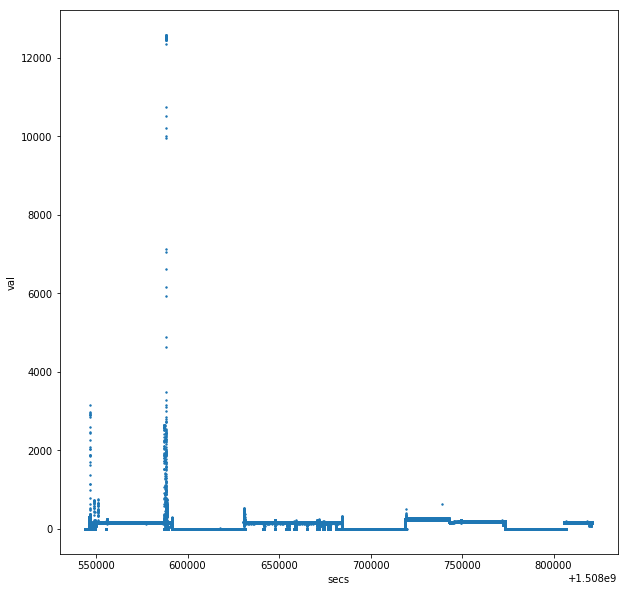

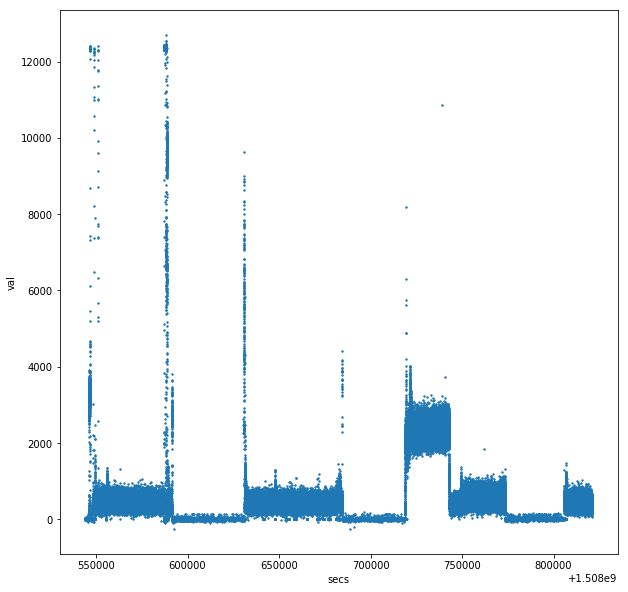

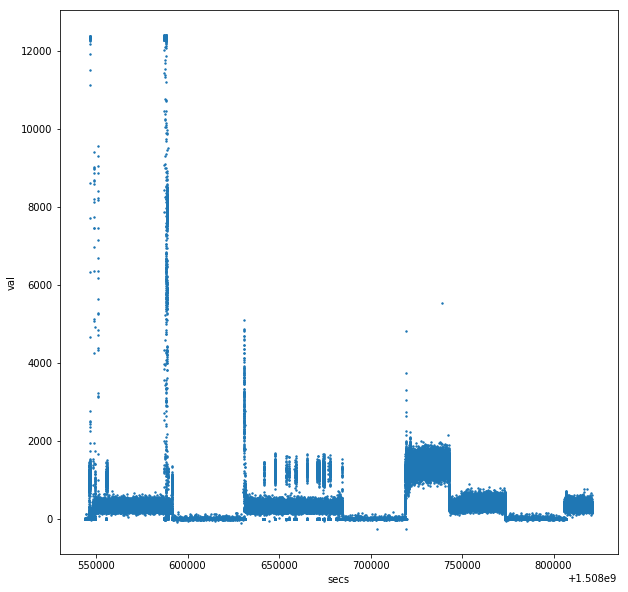

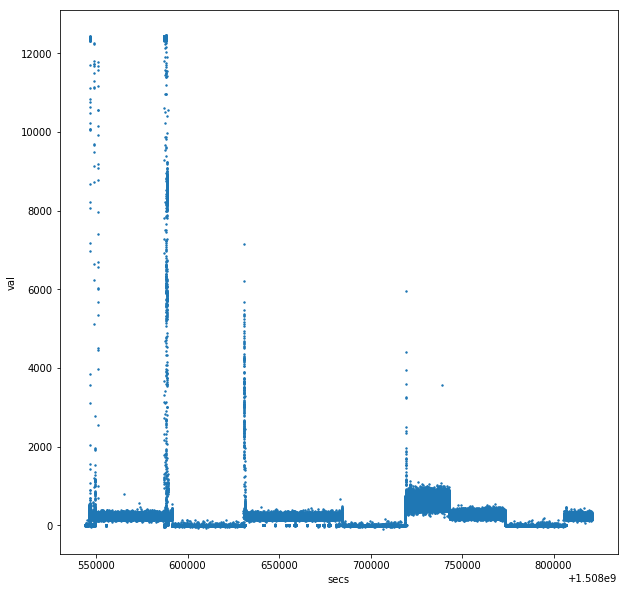

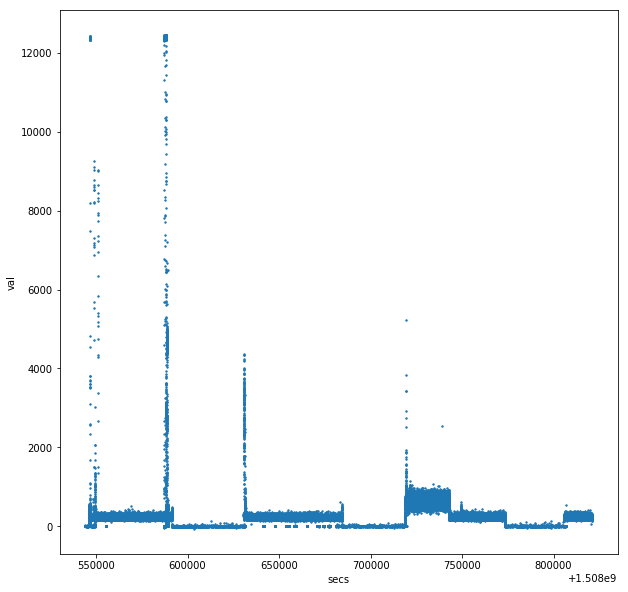

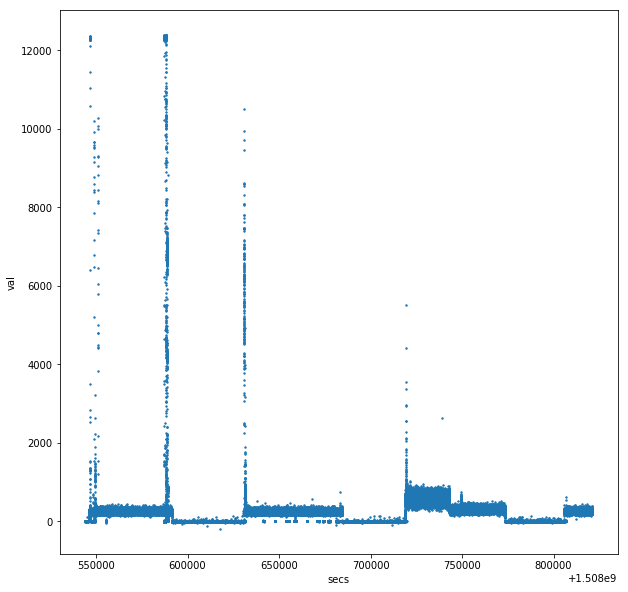

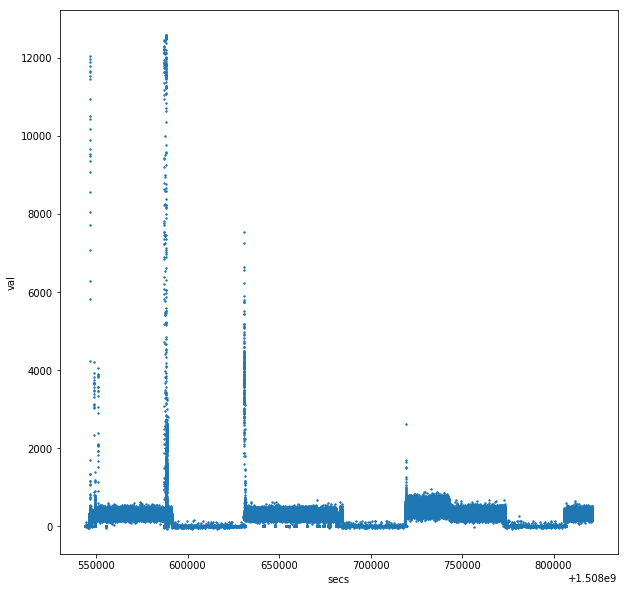

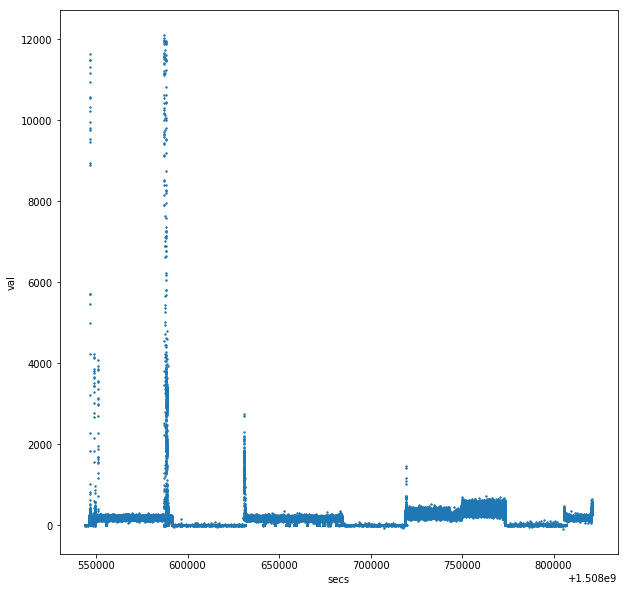

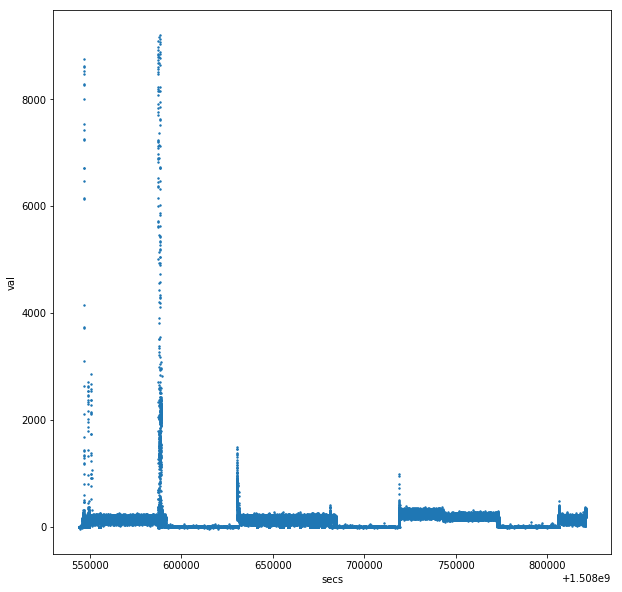

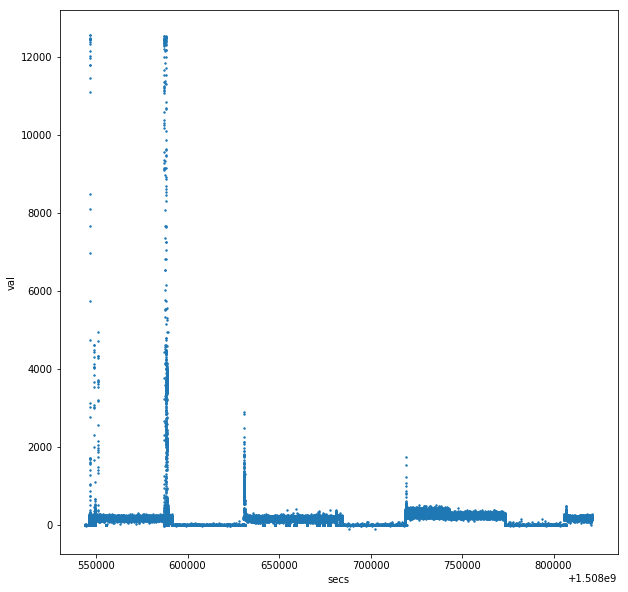

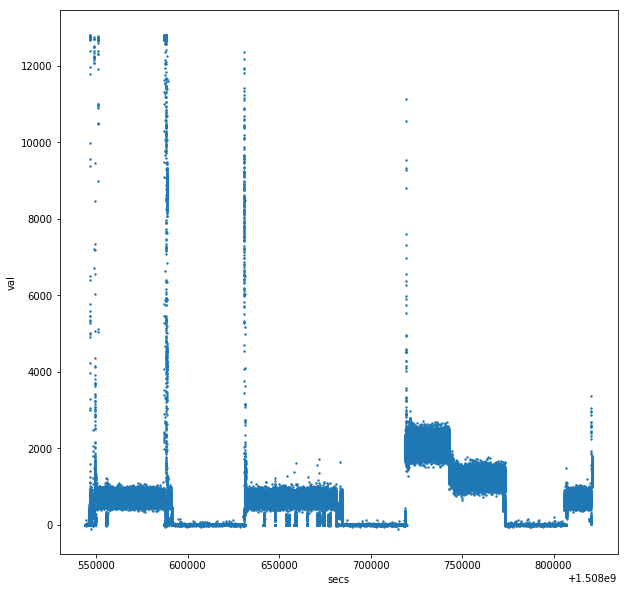

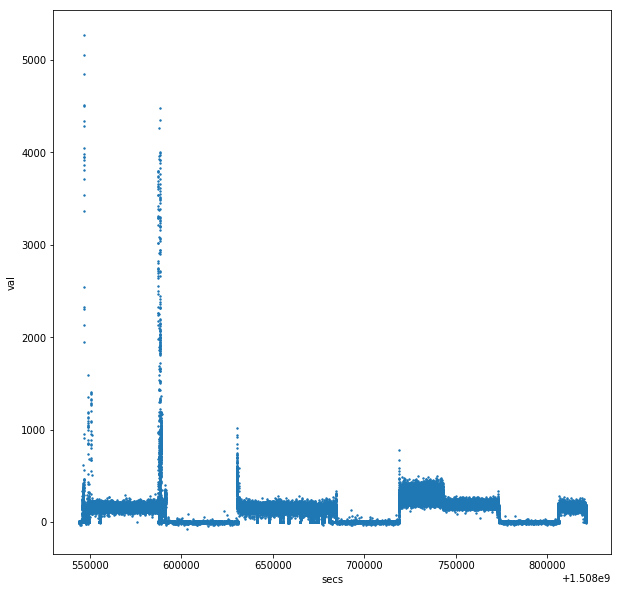

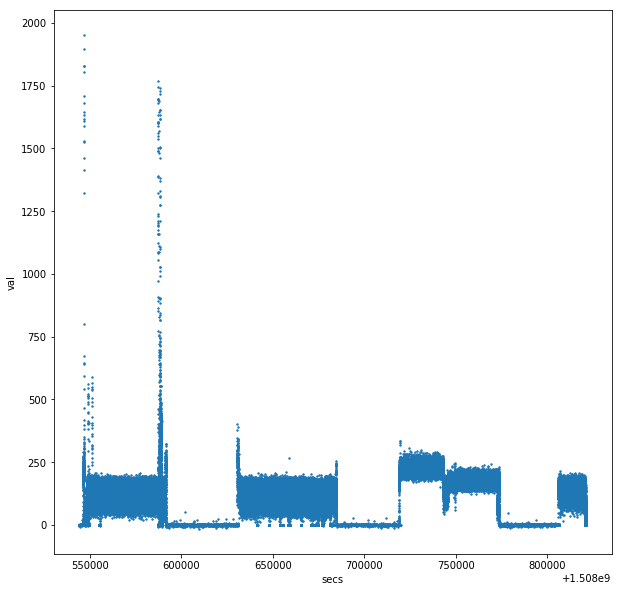

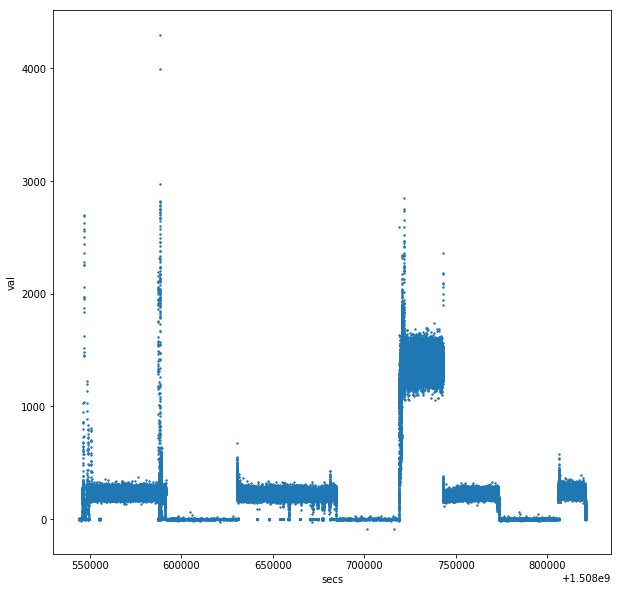

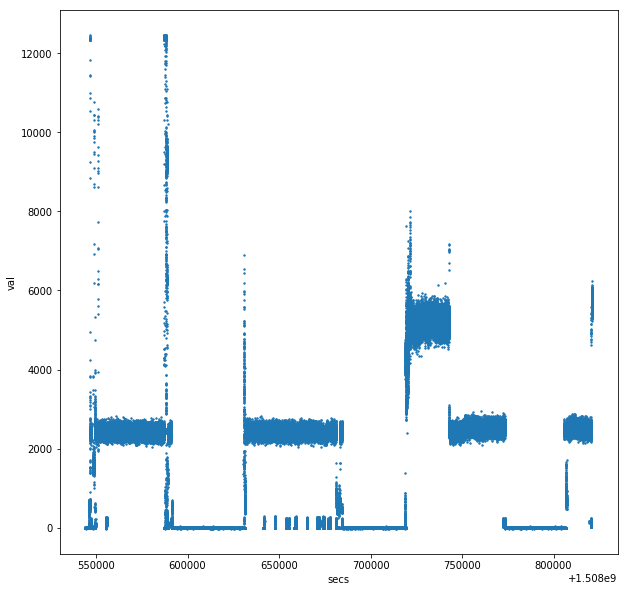

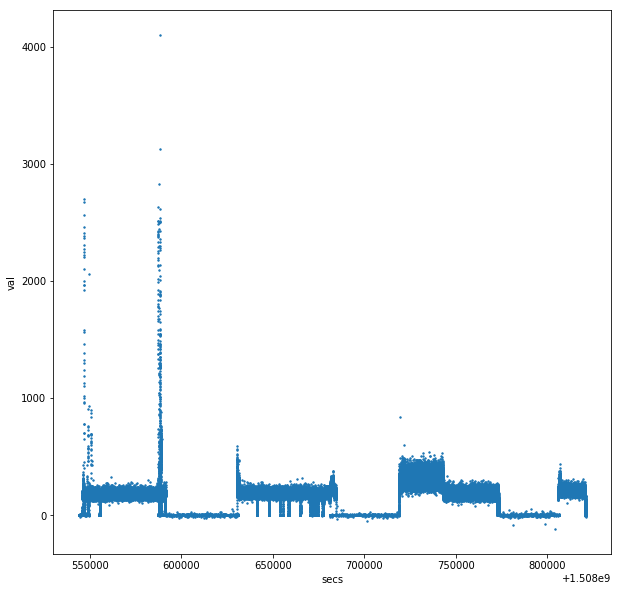

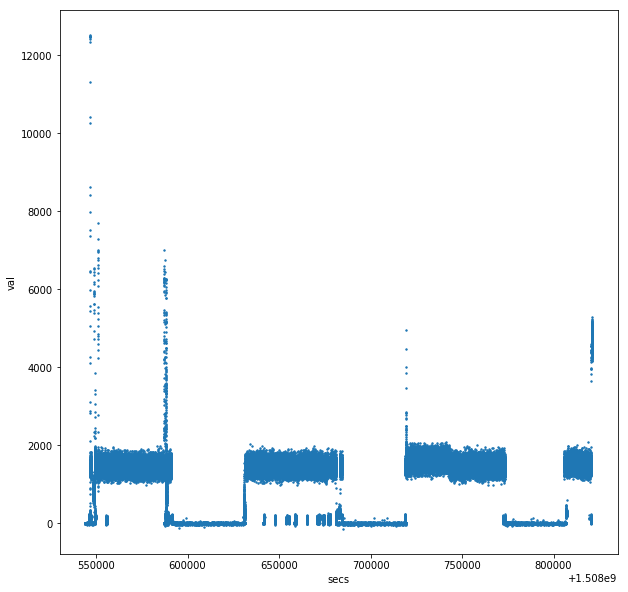

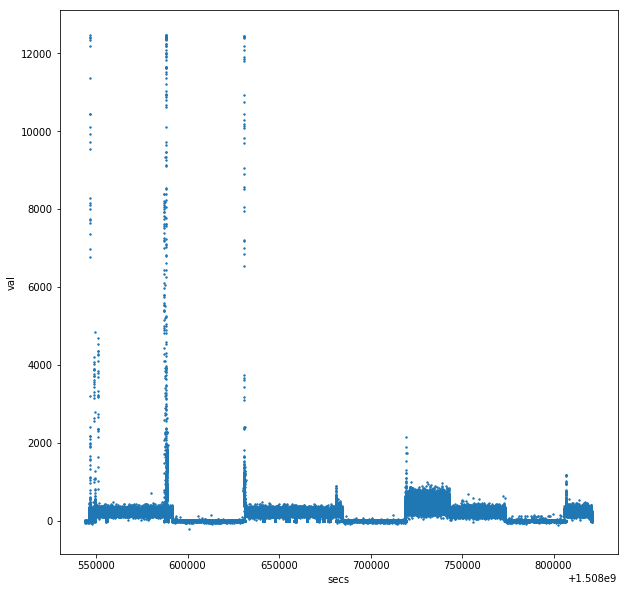

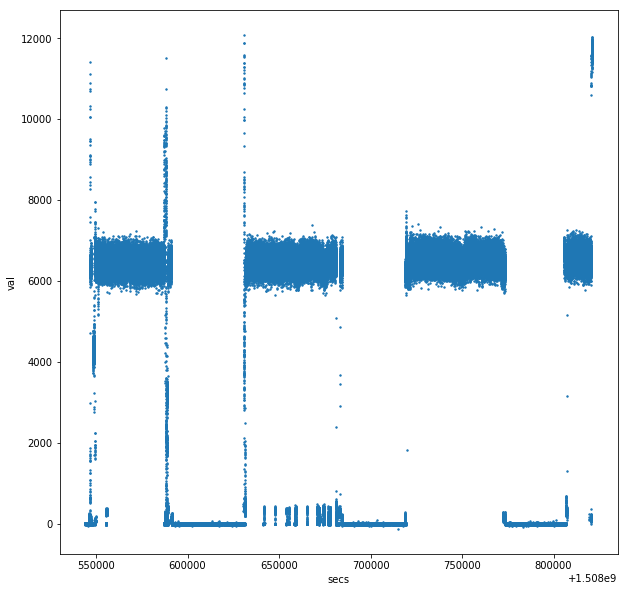

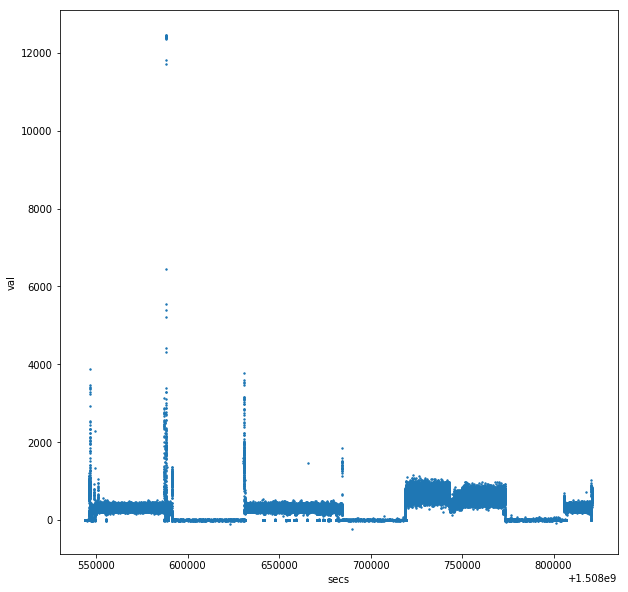

In [73]:
scatter_plot(hblm_bot, 'hblmb')

**Hard X-ray BLM top visualization**

- Data Period: 2017.01.01 08:00:00 ~ 2017.10.24 04:59:58 
- Seconds and nano seconds match to BLM bottom parameters 

In [74]:
hblm_top = data_prep.load_csv(hblm_top_csv, param_dir='target/blm')

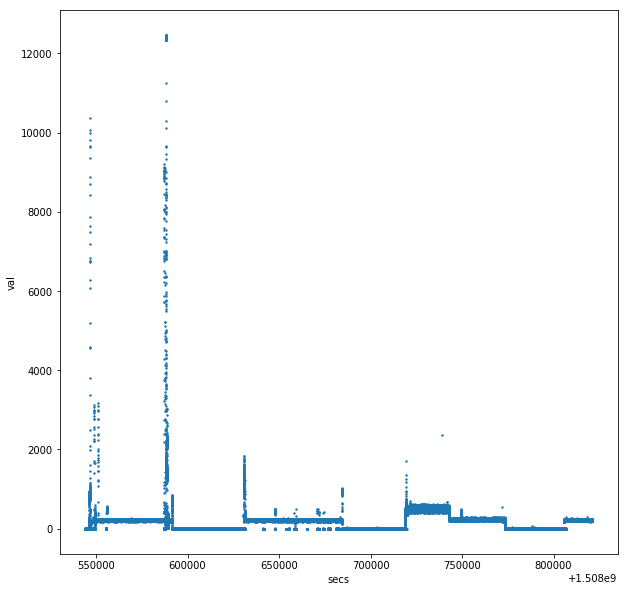

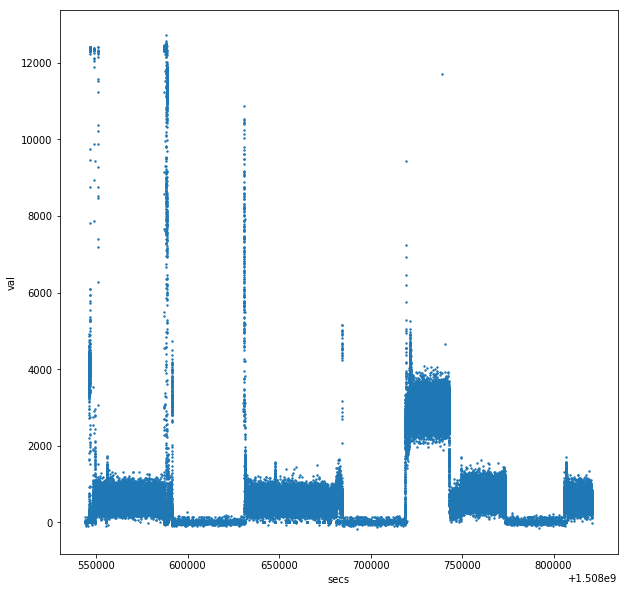

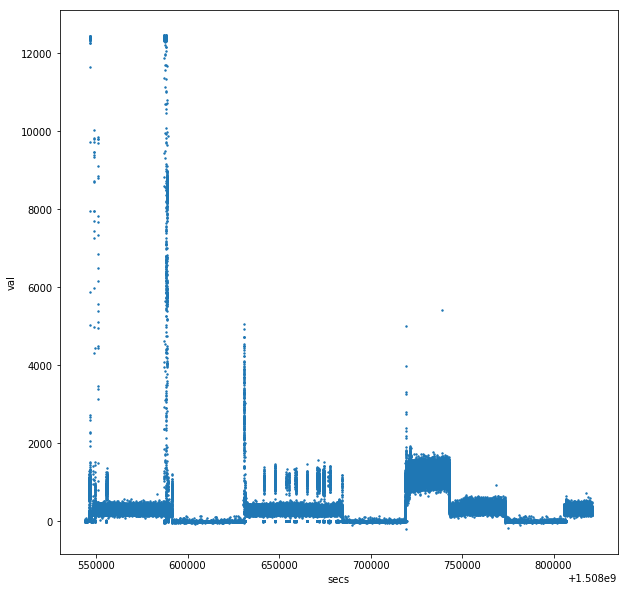

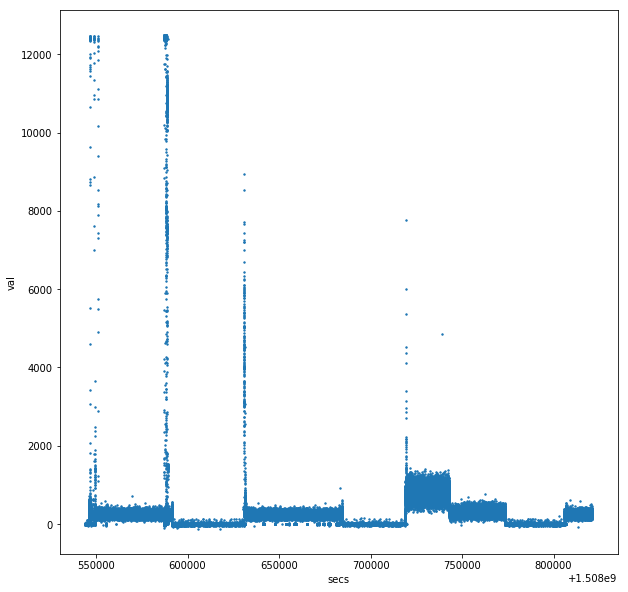

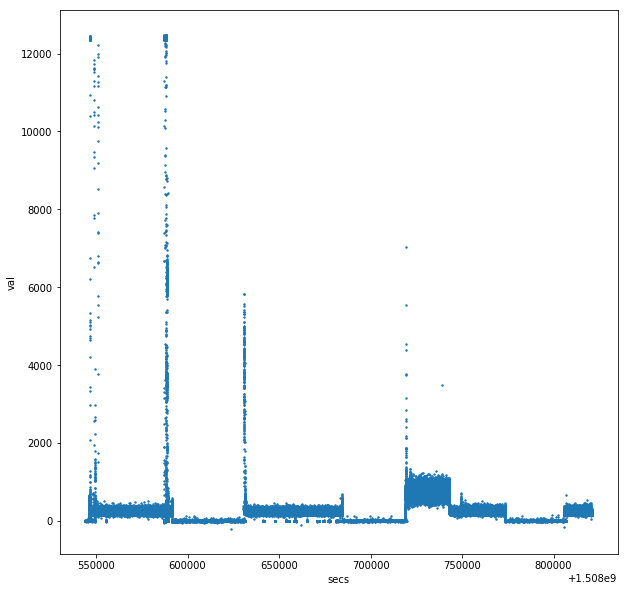

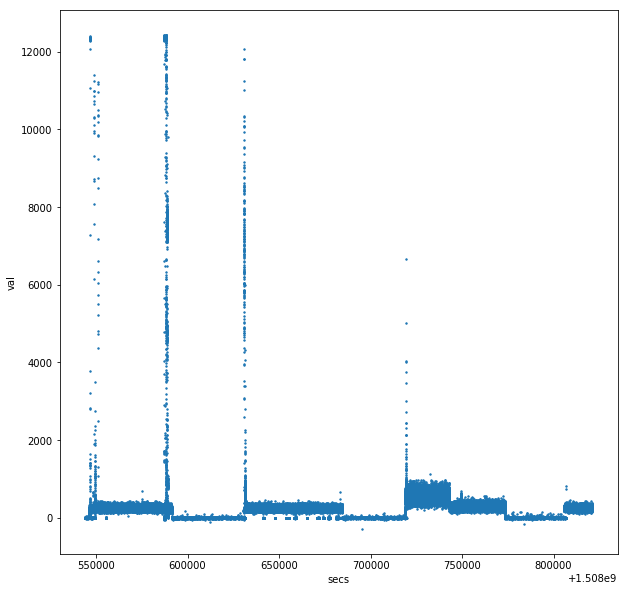

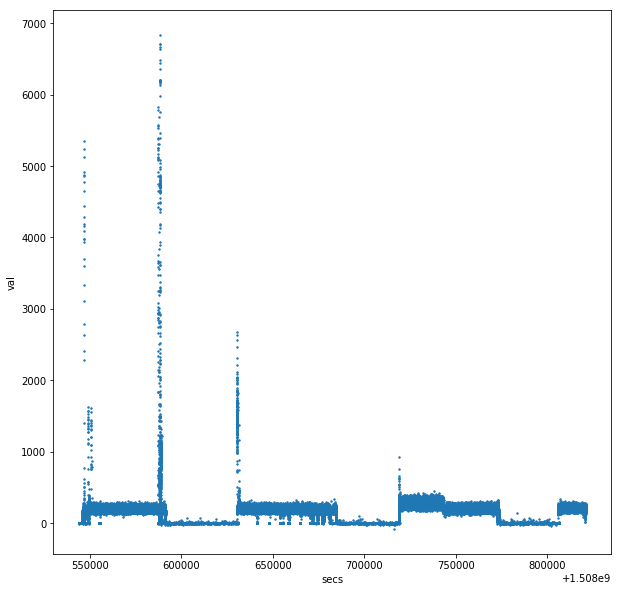

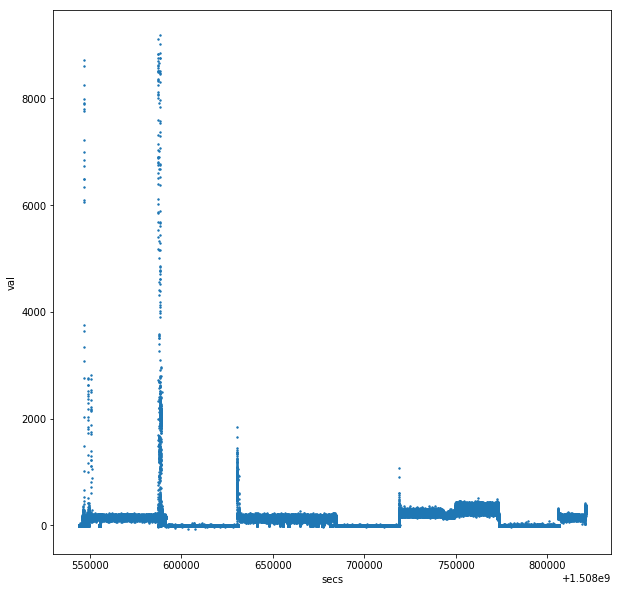

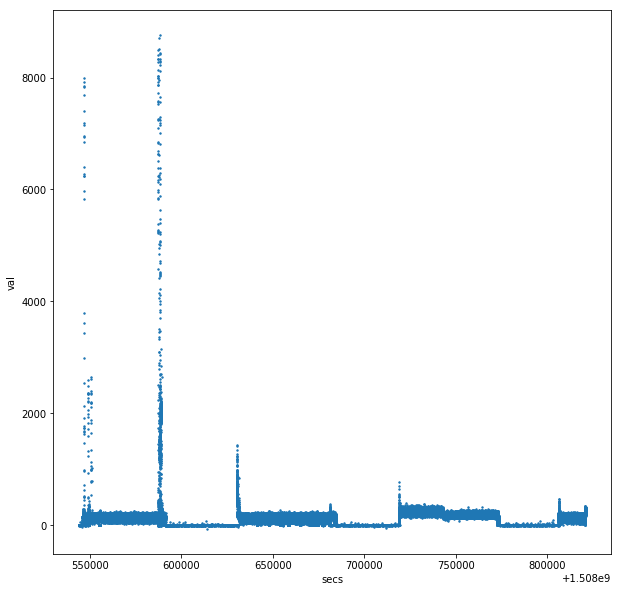

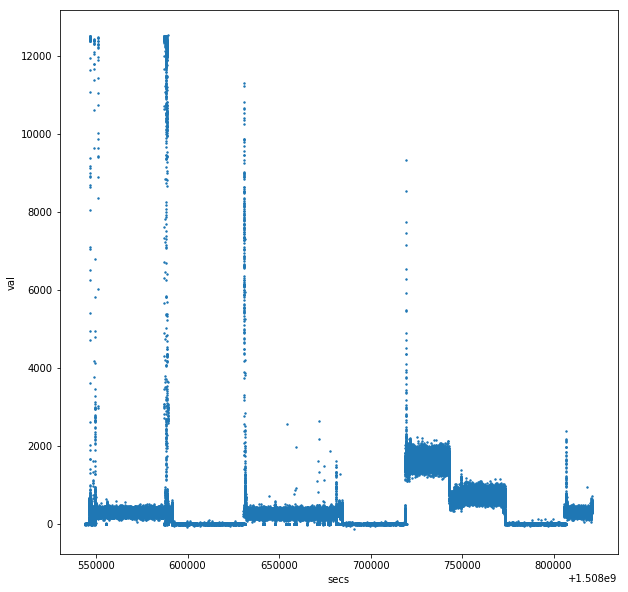

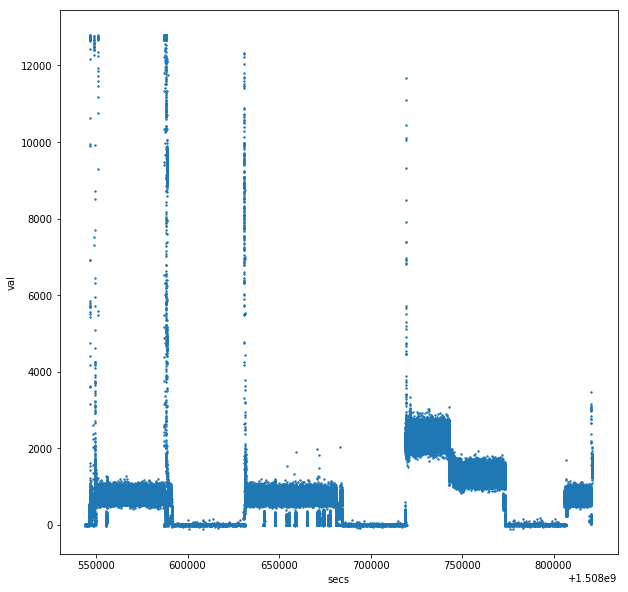

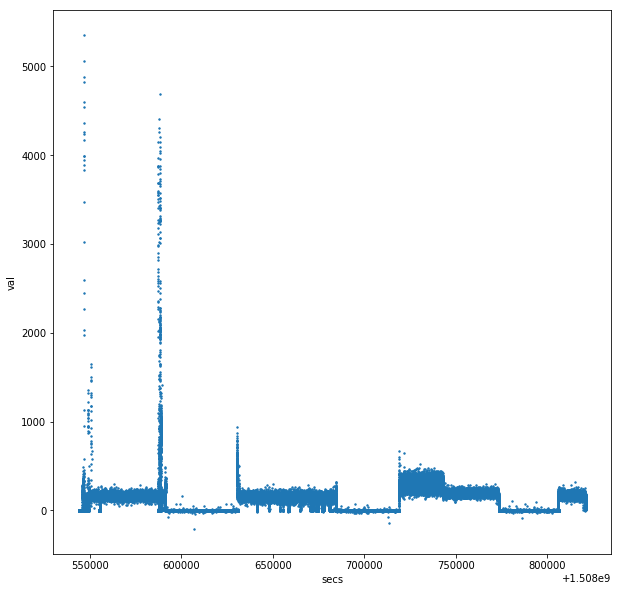

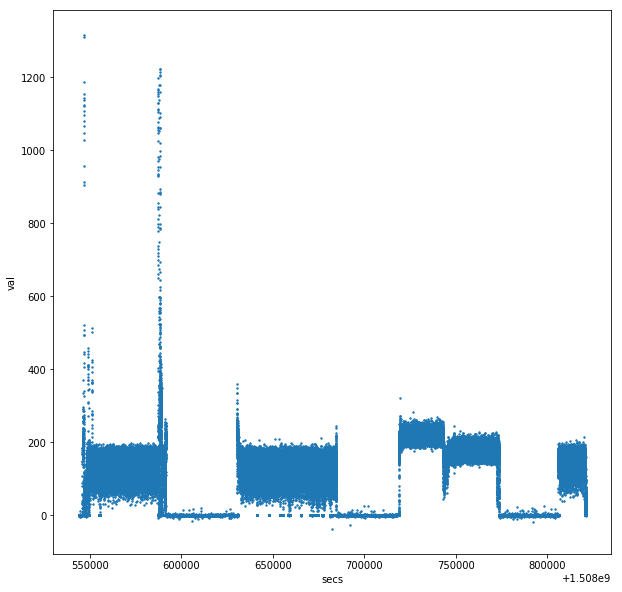

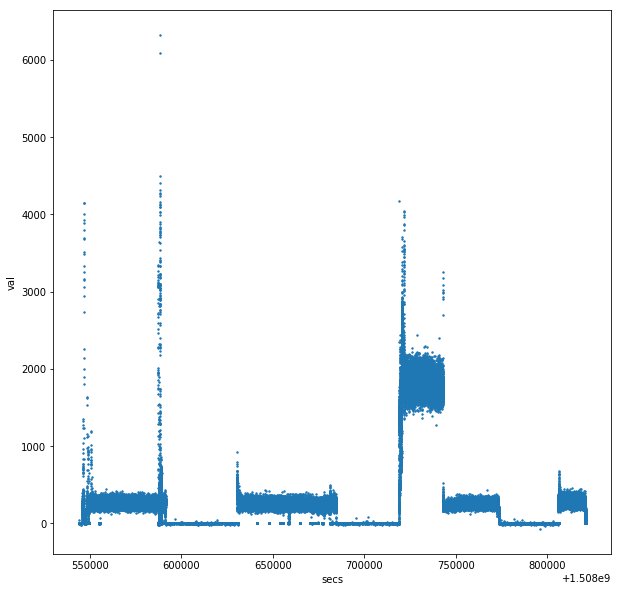

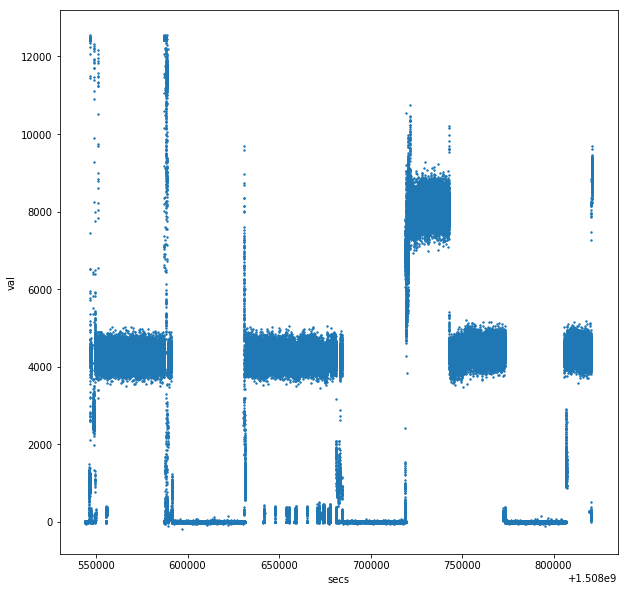

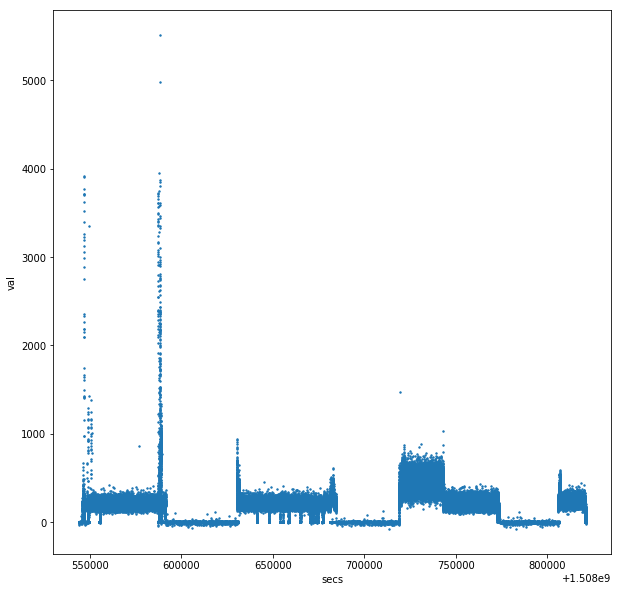

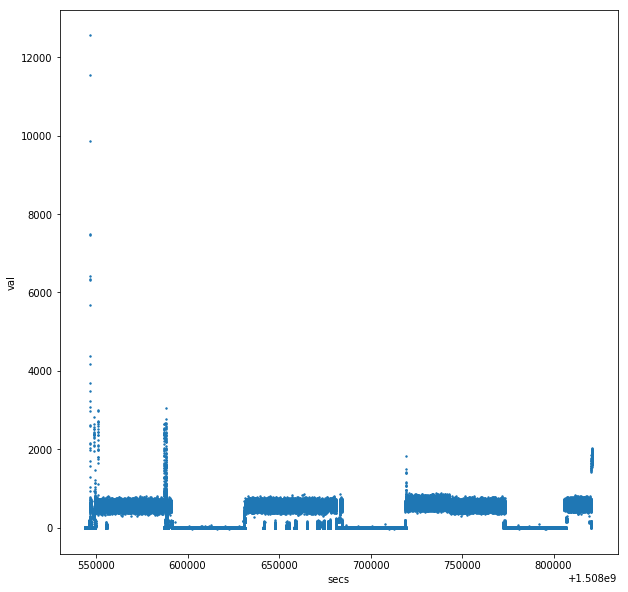

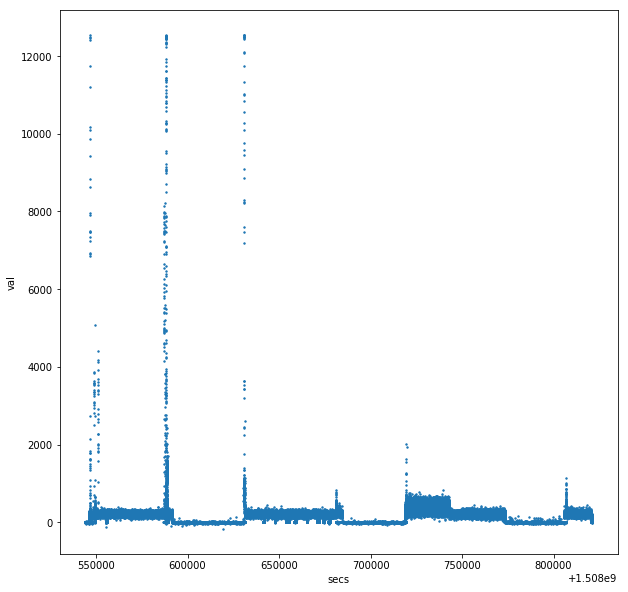

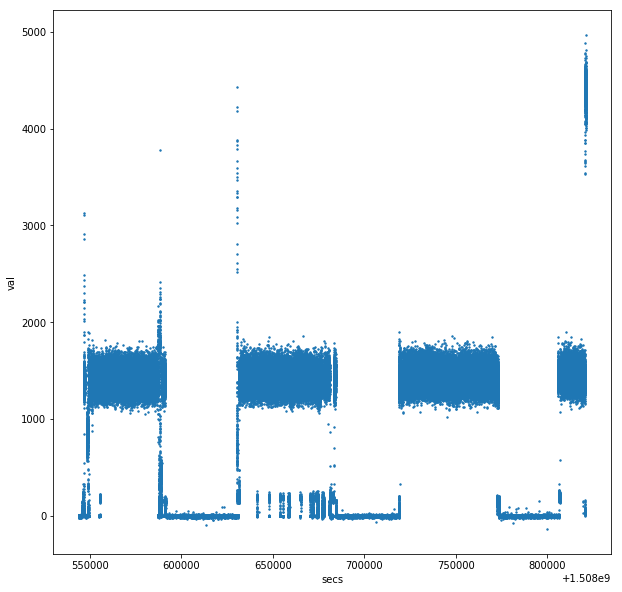

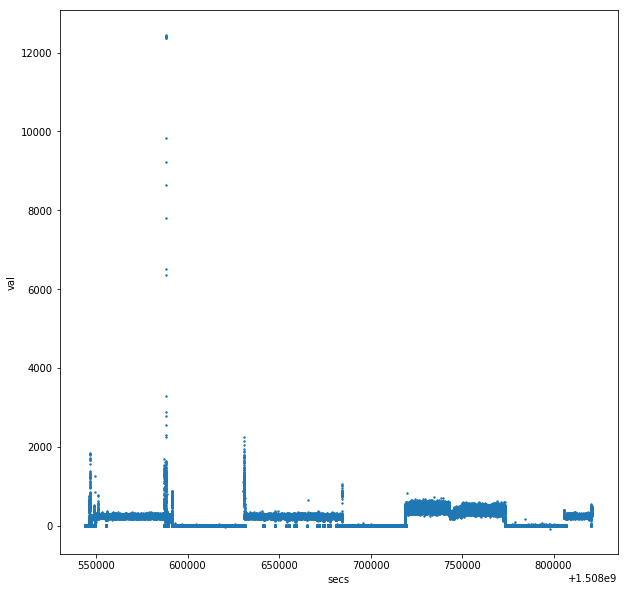

In [76]:
scatter_plot(hblm_top, 'hblmt')